In [ ]:
### Test 1A

# Direct Solve & Laplace Equation solve
# u(x,y) = 5.1*( X[:,0] - 0.87 )**2 - 5.1*( X[:,1] + 0.34 )**2
#  in a polar region r = 0.72*cos^5(theta) + 1.3
#  Compare PDE solver with Direct solver

# a. Number of interior points
# c. Depth of NN
# d. Width of NN

In [1]:
import pickle

with open('experiments/example1_steps_parameters.pickle', 'rb') as f:
    parameters = pickle.load(f)

with open('experiments/example1_steps_losserror.pickle', 'rb') as f:
    loss_error = pickle.load(f)

steps = range(parameters['trainingsteps'])
L2loss = loss_error['loss']['L2 interior loss']
L2error = loss_error['errors']['L2 error']
Linferror = loss_error['errors']['Linf error']

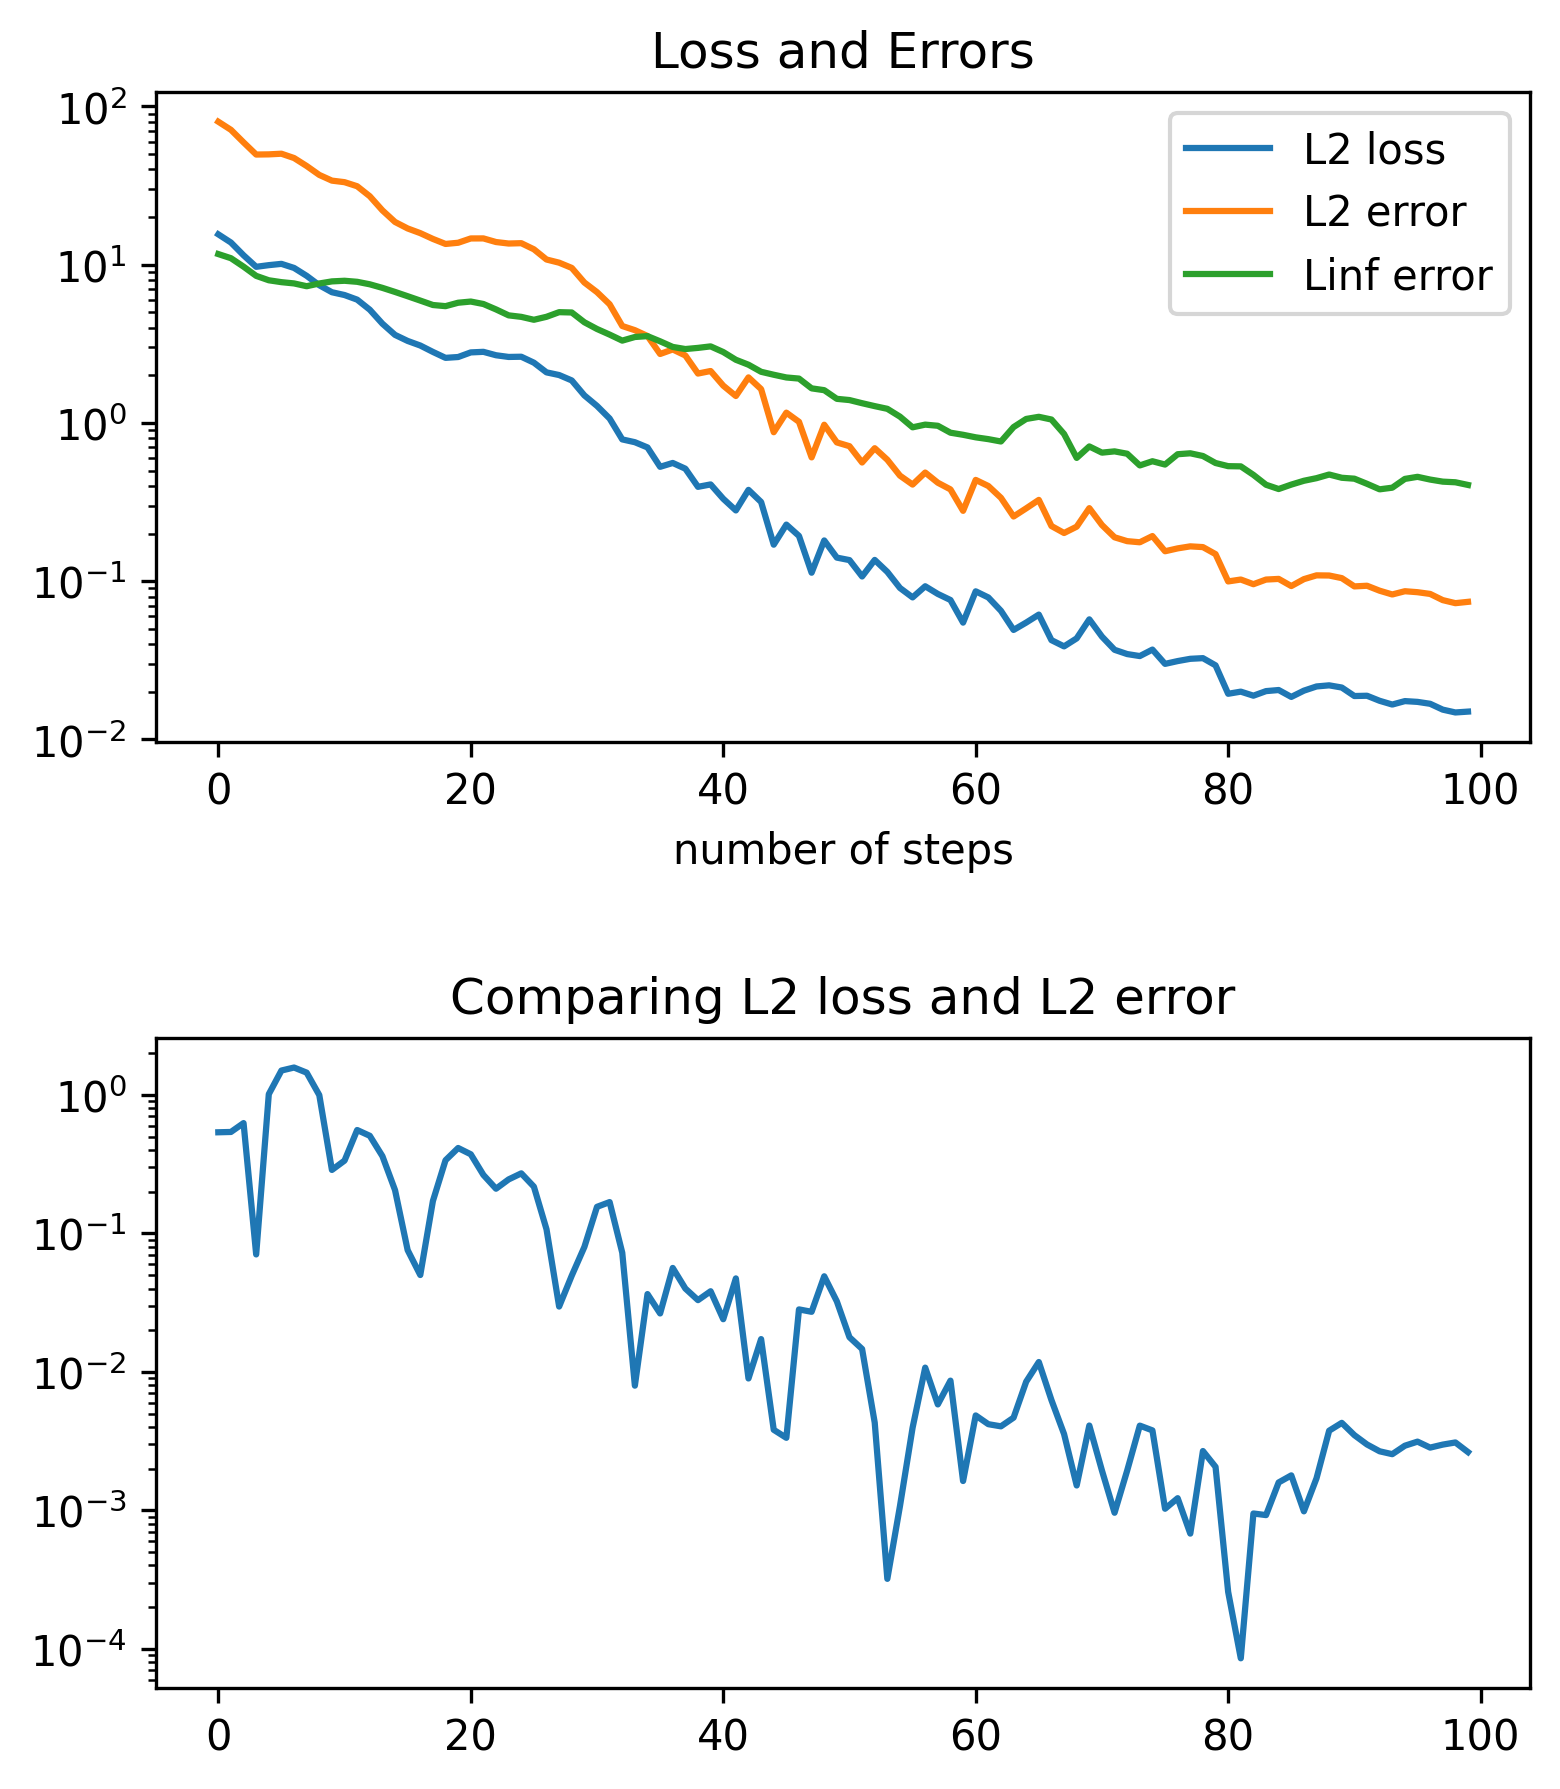

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Loss and Errors')

ax.semilogy(steps, L2loss)
ax.semilogy(steps, L2error)
ax.semilogy(steps, Linferror)
ax.legend(['L2 loss', 'L2 error', 'Linf error'])
ax.set_xlabel('number of steps')

#ax[1].set_title('Comparing L2 loss and L2 error')
#ax[1].semilogy(steps, np.abs( 5.1148*L2loss - L2error) )

In [6]:
import importlib
import DRLPDE.create as create

param = importlib.import_module("." + 'example1', package='examples')

Domain = create.SpaceDomain(param.boundingbox, 
                            param.list_of_walls, 
                            param.solid_walls, 
                            param.inlet_outlet, 
                            param.list_of_periodic_ends, 
                            param.mesh)

In [7]:
Domain.volume

tensor(5.1148)